<a href="https://colab.research.google.com/github/paishowstopper/TSAI/blob/main/EVA5/Session_10/Session_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.backends.cudnn as cudnn
from torch.optim.lr_scheduler import ReduceLROnPlateau

Uploaded files to colab before execution (Uploaded in "framework" folder in github)

In [2]:
from model import BasicBlock, ResNet  
from datatransform import DataTransformation
from dataloader import Loader
from train import Train
from test import Test
import helper
# Reference: https://github.com/davidtvs/pytorch-lr-finder
from lr_finder import LRFinder

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [4]:
transform = DataTransformation()
#Different transforms for training and testing in this assignment
trainTransform = transform.AlbumentationTrainTransform()
testTransform = transform.AlbumentationTestTransform()

loader = Loader(trainTransform, testTransform)
#Going with the default variable values set in the data loader
trainloader, testloader, classes = loader.CIFAR10Load()


Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  cat  deer  ship  frog


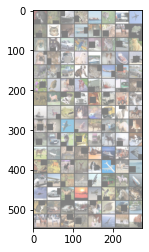

In [5]:
# Show random training images (default 4)
helper.DisplayImages(trainloader, classes)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  car  ship   car   cat


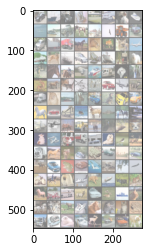

In [6]:
# Show random testing images (default 4)
helper.DisplayImages(testloader, classes)

In [7]:
model = ResNet(BasicBlock, [2, 2, 2, 2]).to(device)
model = torch.nn.DataParallel(model)
cudnn.benchmark = True

In [8]:
#Display model summary
helper.DisplayModelSummary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.23E-02


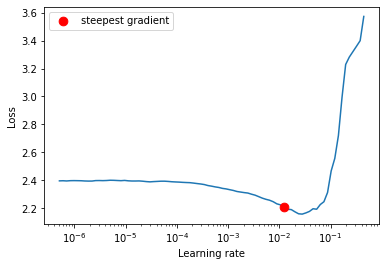

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7, momentum=0.9)
lr_finder = LRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(trainloader, end_lr=1, num_iter=100)
lr_finder.plot()
lr_finder.reset()

In [10]:
min_loss = min(lr_finder.history['loss'])
min_index = lr_finder.history['loss'].index(min_loss)
lr_value = lr_finder.history['lr'][min_index]

In [11]:
lr_value

0.02782559402207125

https://pytorch.org/docs/stable/optim.html#torch.optim.lr_scheduler.ReduceLROnPlateau

In [12]:
optimizer = optim.SGD(model.parameters(), lr=1.23E-02, momentum=0.9)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=5, factor=.2)

In [13]:
epochs = 50

In [14]:
#Training
Train(trainloader, model, criterion, optimizer, scheduler, device, epochs).train()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[1,   391] loss: 551.108
Accuracy:  48.826
[2,   391] loss: 358.129
Accuracy:  67.41
[3,   391] loss: 279.879
Accuracy:  74.964
[4,   391] loss: 232.725
Accuracy:  79.09
[5,   391] loss: 202.271
Accuracy:  81.906
[6,   391] loss: 178.331
Accuracy:  84.016
[7,   391] loss: 154.848
Accuracy:  86.156
[8,   391] loss: 138.803
Accuracy:  87.46
[9,   391] loss: 126.083
Accuracy:  88.672
[10,   391] loss: 115.006
Accuracy:  89.788
[11,   391] loss: 102.165
Accuracy:  90.886
[12,   391] loss: 93.726
Accuracy:  91.638
[13,   391] loss: 83.758
Accuracy:  92.548
[14,   391] loss: 79.036
Accuracy:  92.878
[15,   391] loss: 70.539
Accuracy:  93.62
[16,   391] loss: 64.313
Accuracy:  94.274
[17,   391] loss: 59.354
Accuracy:  94.654
[18,   391] loss: 56.001
Accuracy:  94.962
[19,   391] loss: 51.995
Accuracy:  95.264
[20,   391] loss: 49.749
Accuracy:  95.61
[21,   391] loss: 47.311
Accuracy:  95.768
[22,   391] loss: 42.926
Accuracy:  96.228
[23,   391] loss: 41.957
Accuracy:  96.258
[24,   391] lo

([551.1079018115997,
  358.12889128923416,
  279.8787245452404,
  232.7250199317932,
  202.27088102698326,
  178.33096787333488,
  154.84815782308578,
  138.80278013646603,
  126.0832152813673,
  115.00577791035175,
  102.1653550490737,
  93.72607719153166,
  83.75847536325455,
  79.03558279573917,
  70.53912075608969,
  64.31279239058495,
  59.354043908417225,
  56.00088766589761,
  51.99477218091488,
  49.74851293861866,
  47.311197098344564,
  42.92641957104206,
  41.95652000233531,
  25.64653468783945,
  20.138950197491795,
  18.358925567241386,
  16.565054026665166,
  16.688604237278923,
  15.025779952760786,
  13.582649361575022,
  14.340092877391726,
  14.208697419147938,
  13.181134304497391,
  12.933375793276355,
  12.684901291737333,
  12.432151569169946,
  11.921632636222057,
  11.146048189839348,
  12.07268087589182,
  11.232030776911415,
  11.685140455316287,
  10.970545748015866,
  9.847991790506057,
  9.443255140329711,
  9.477588592853863,
  9.582948396564461,
  9.43896

In [15]:
#Testing
Test(testloader, model, criterion, device).test()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy of the network on the 10000 test images: 89 %


([tensor(0.6012, device='cuda:0'),
  tensor(0.4595, device='cuda:0'),
  tensor(0.2483, device='cuda:0'),
  tensor(0.3453, device='cuda:0'),
  tensor(0.3290, device='cuda:0'),
  tensor(0.3634, device='cuda:0'),
  tensor(0.4442, device='cuda:0'),
  tensor(0.5510, device='cuda:0'),
  tensor(0.3011, device='cuda:0'),
  tensor(0.6617, device='cuda:0'),
  tensor(0.2997, device='cuda:0'),
  tensor(0.6566, device='cuda:0'),
  tensor(0.5529, device='cuda:0'),
  tensor(0.3236, device='cuda:0'),
  tensor(0.3368, device='cuda:0'),
  tensor(0.2740, device='cuda:0'),
  tensor(0.6515, device='cuda:0'),
  tensor(0.4140, device='cuda:0'),
  tensor(0.6276, device='cuda:0'),
  tensor(0.5841, device='cuda:0'),
  tensor(0.4228, device='cuda:0'),
  tensor(0.3963, device='cuda:0'),
  tensor(0.5227, device='cuda:0'),
  tensor(0.6165, device='cuda:0'),
  tensor(0.3139, device='cuda:0'),
  tensor(0.4787, device='cuda:0'),
  tensor(0.3259, device='cuda:0'),
  tensor(0.7246, device='cuda:0'),
  tensor(0.2794, dev

In [16]:
helper.DisplayClassAccuracy(model, testloader, classes, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy of plane : 92 %
Accuracy of   car : 100 %
Accuracy of  bird : 95 %
Accuracy of   cat : 86 %
Accuracy of  deer : 90 %
Accuracy of   dog : 85 %
Accuracy of  frog : 96 %
Accuracy of horse : 89 %
Accuracy of  ship : 95 %
Accuracy of truck : 96 %


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3328: UserWarning: nn.functional.upsample is depr

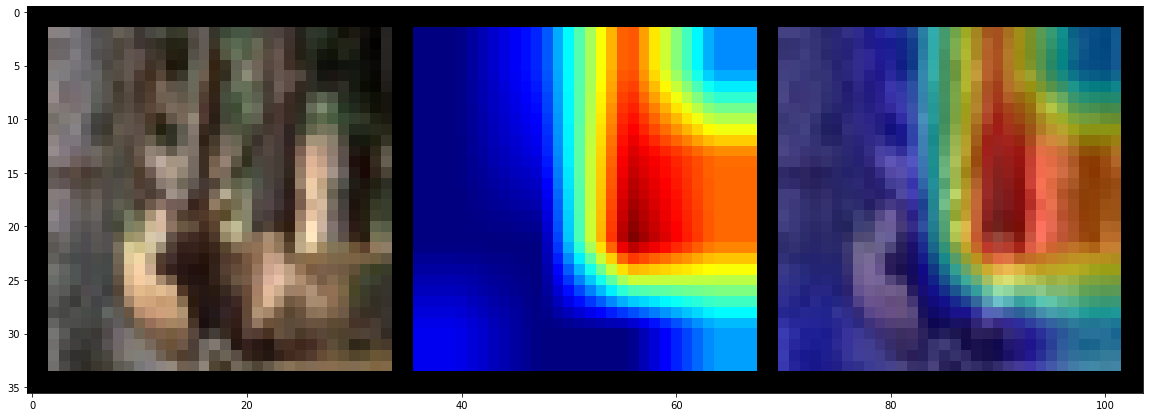

Prediction : deer, Actual : deer


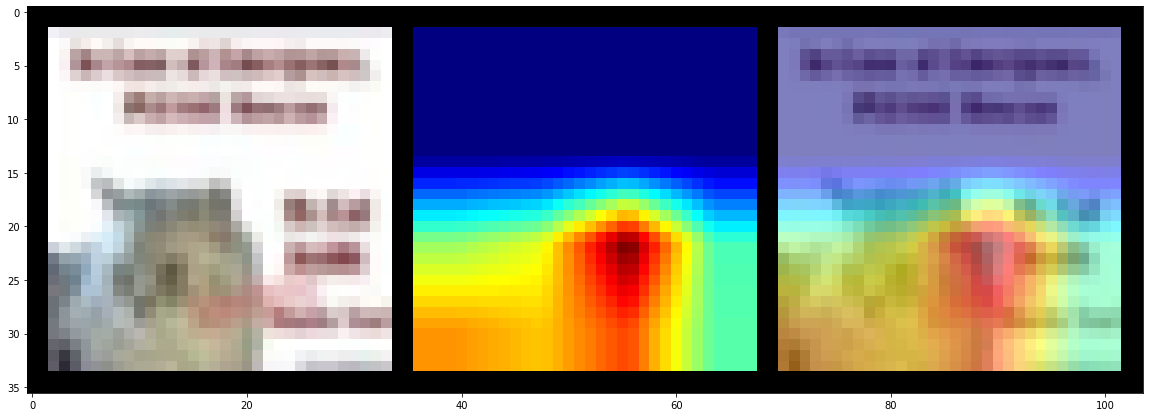

Prediction : cat, Actual : cat


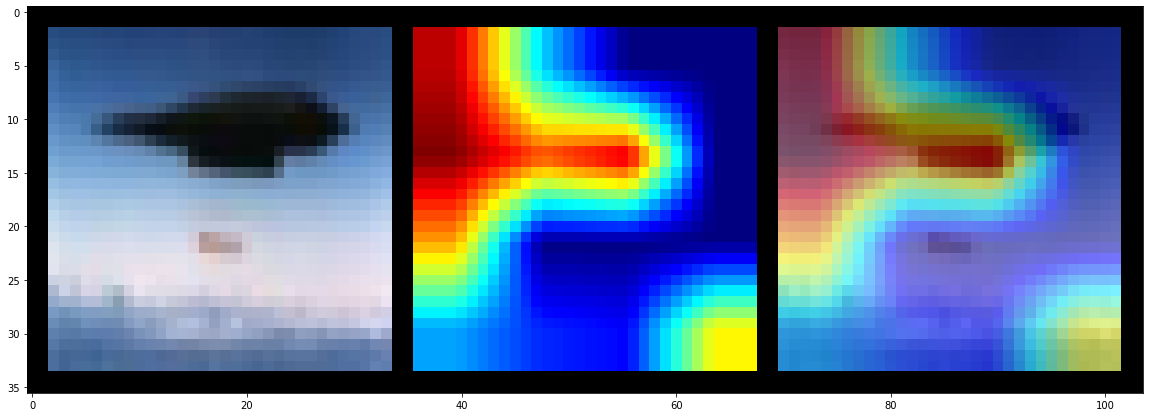

Prediction : plane, Actual : plane


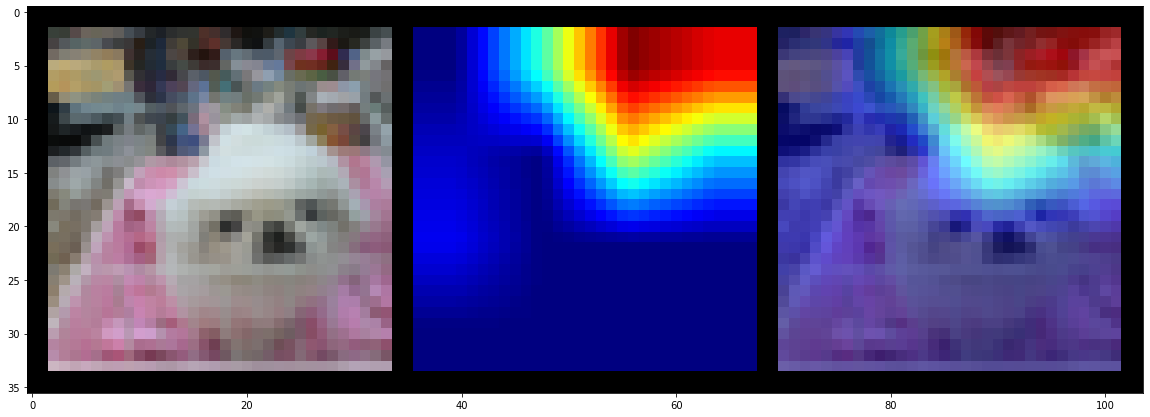

Prediction : dog, Actual : dog


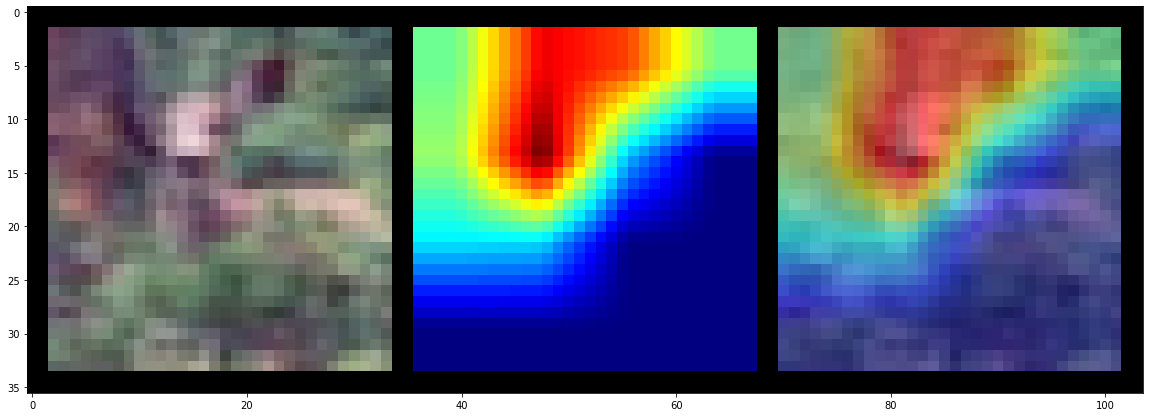

Prediction : deer, Actual : deer


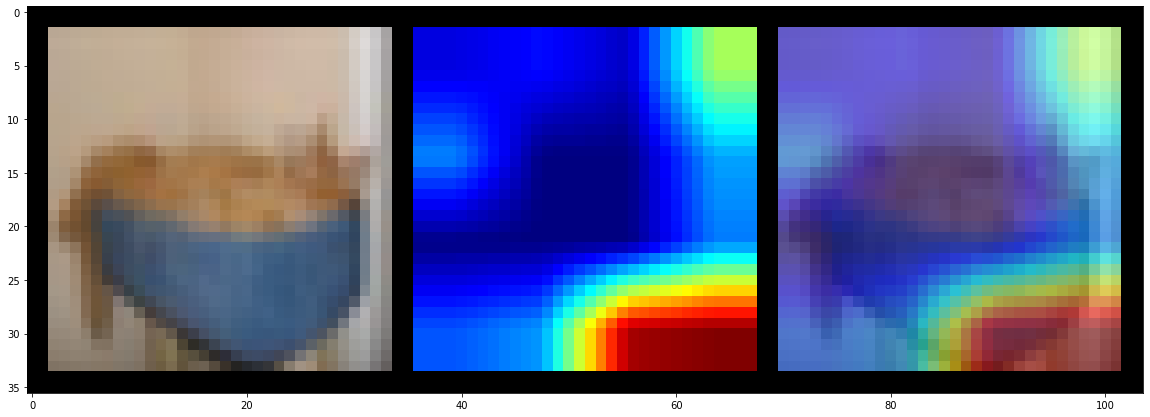

Prediction : cat, Actual : cat


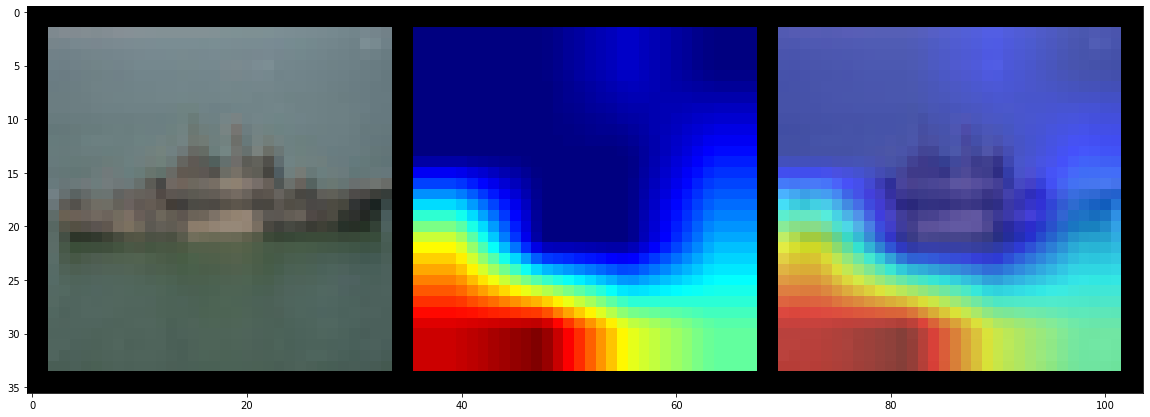

Prediction : ship, Actual : ship


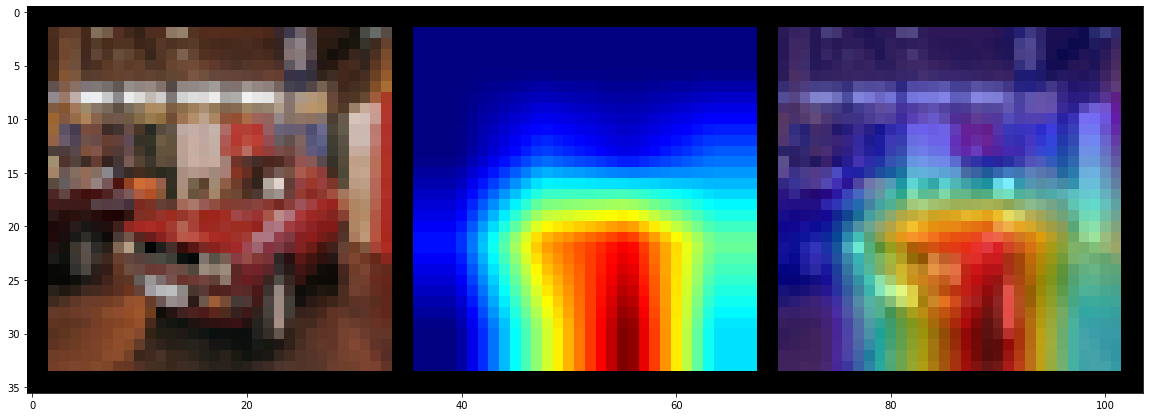

Prediction : car, Actual : car


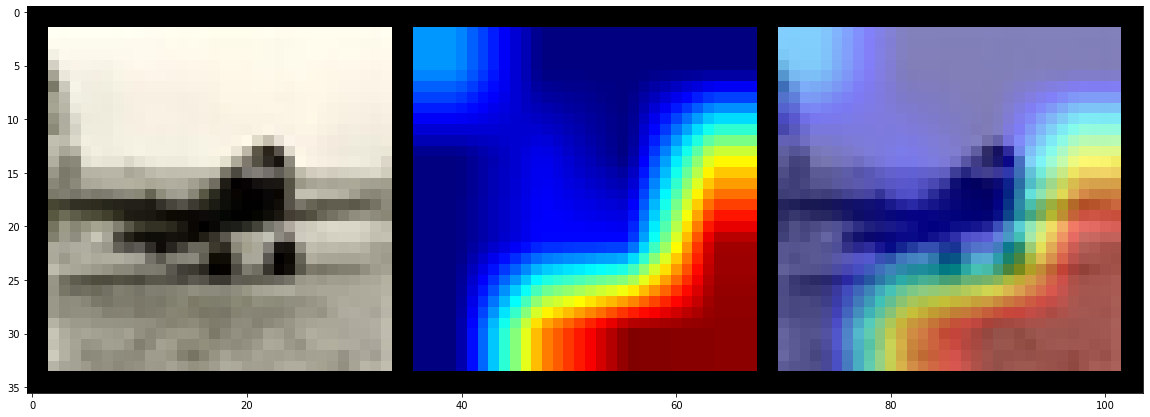

Prediction : plane, Actual : plane


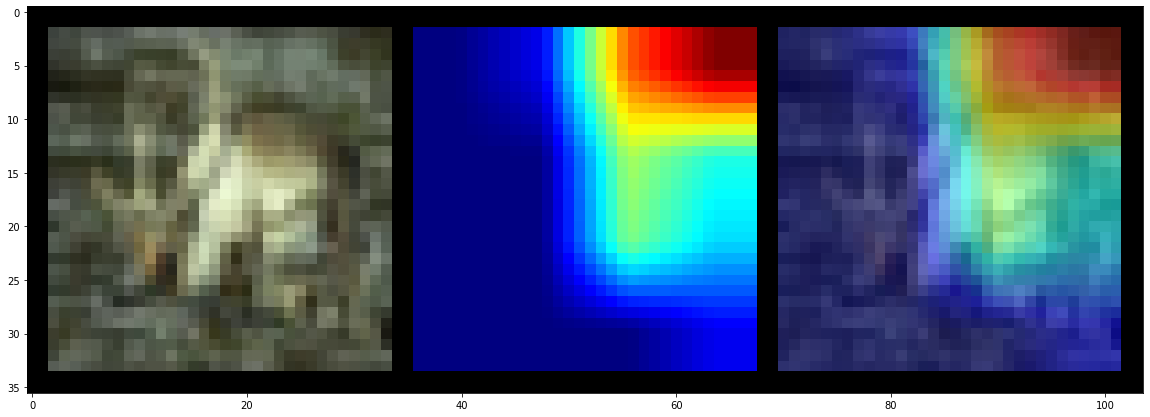

Prediction : deer, Actual : deer


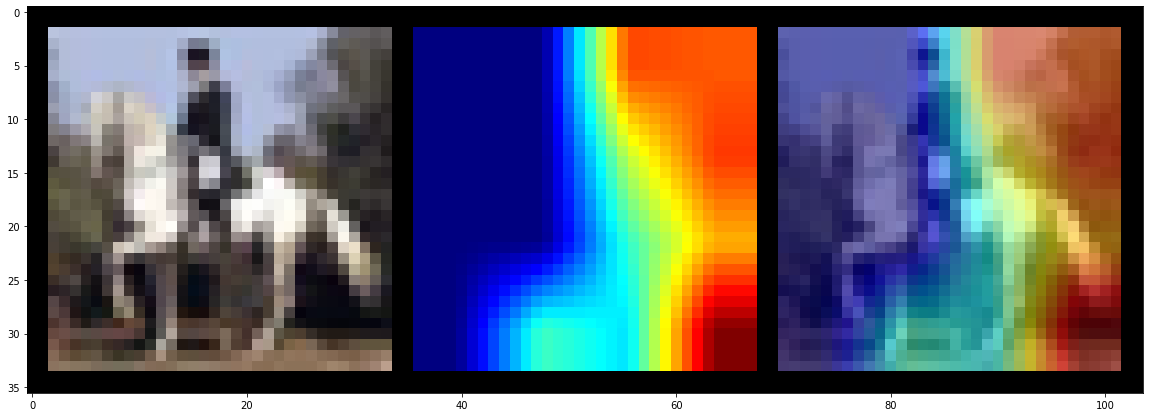

Prediction : horse, Actual : horse


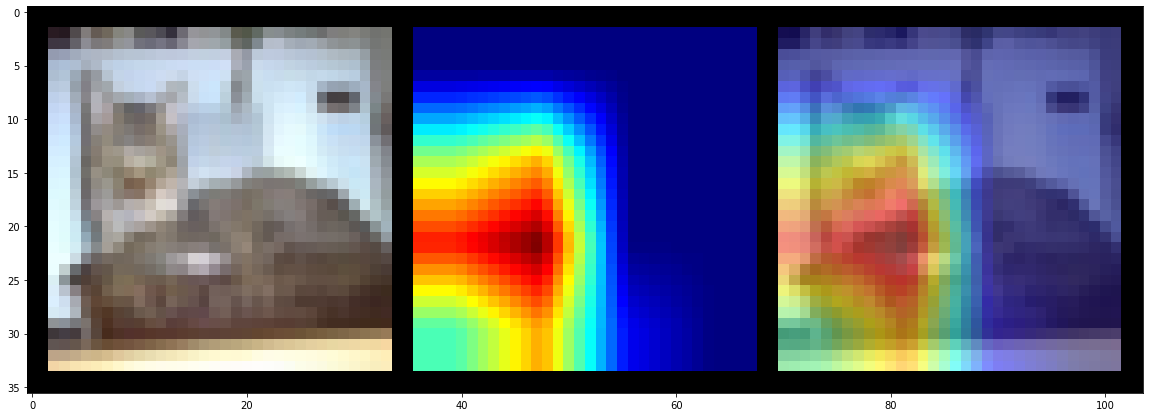

Prediction : cat, Actual : cat


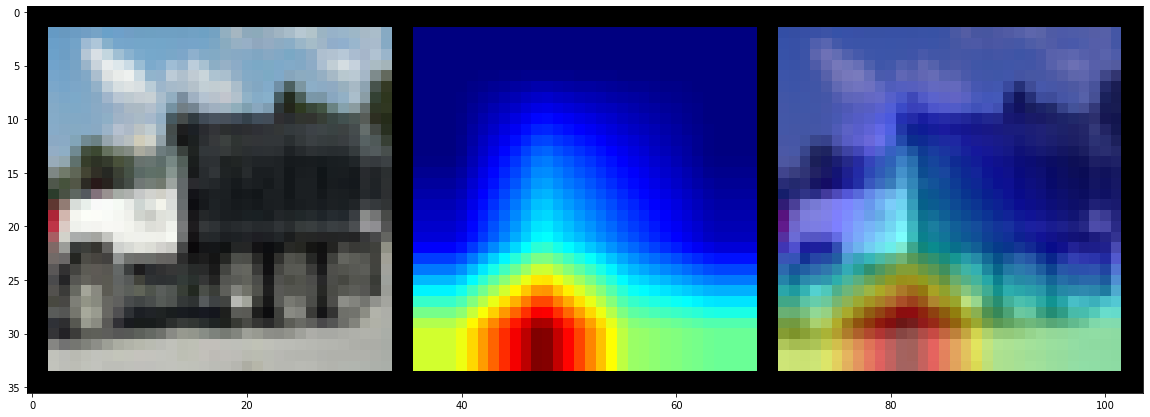

Prediction : truck, Actual : truck


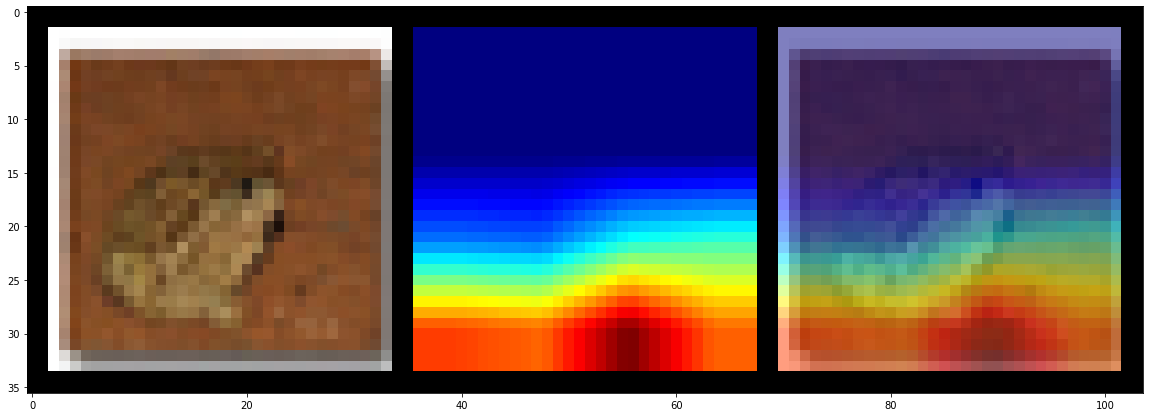

Prediction : frog, Actual : frog


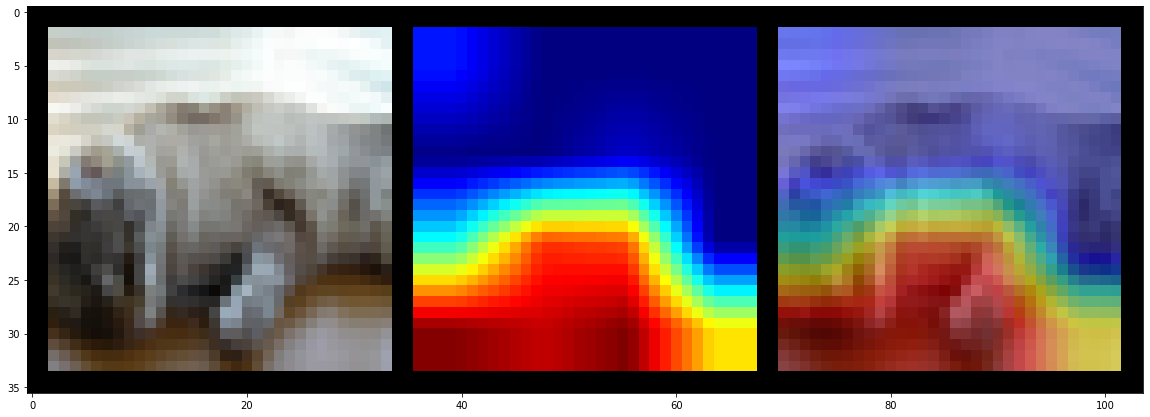

Prediction : cat, Actual : cat


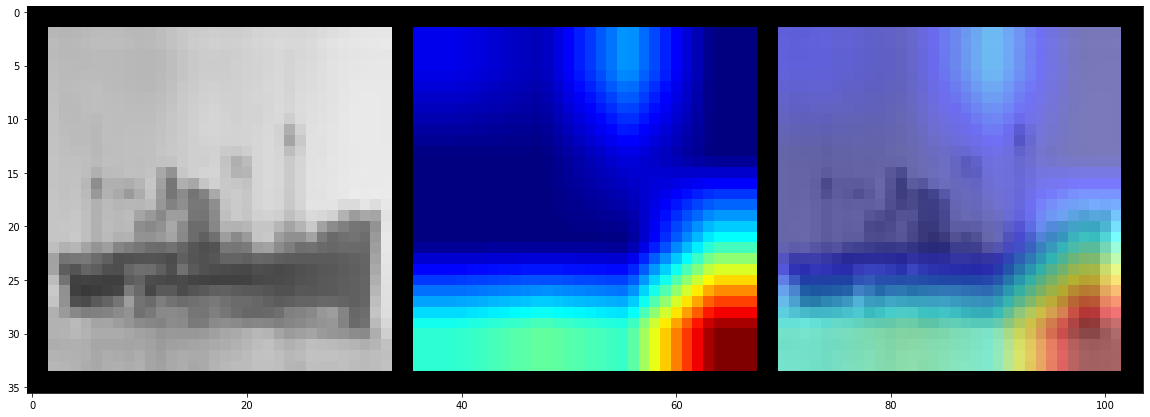

Prediction : ship, Actual : ship


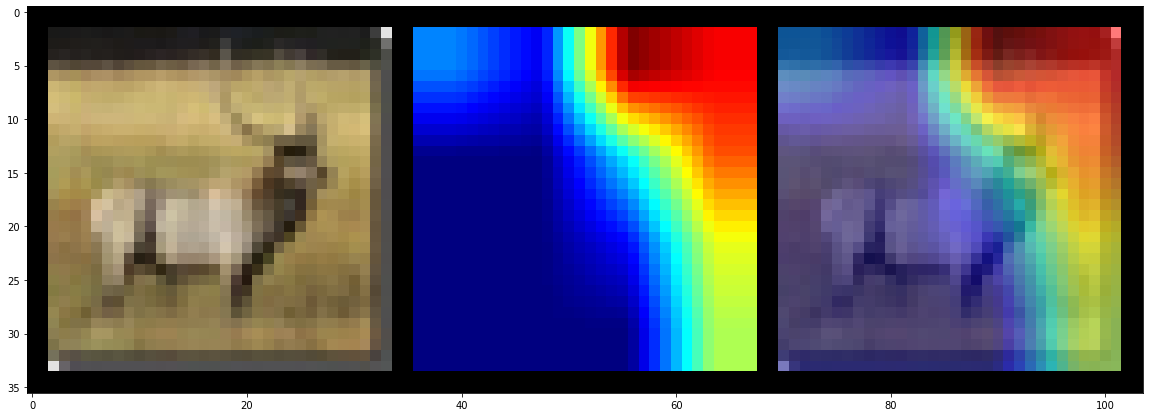

Prediction : deer, Actual : deer


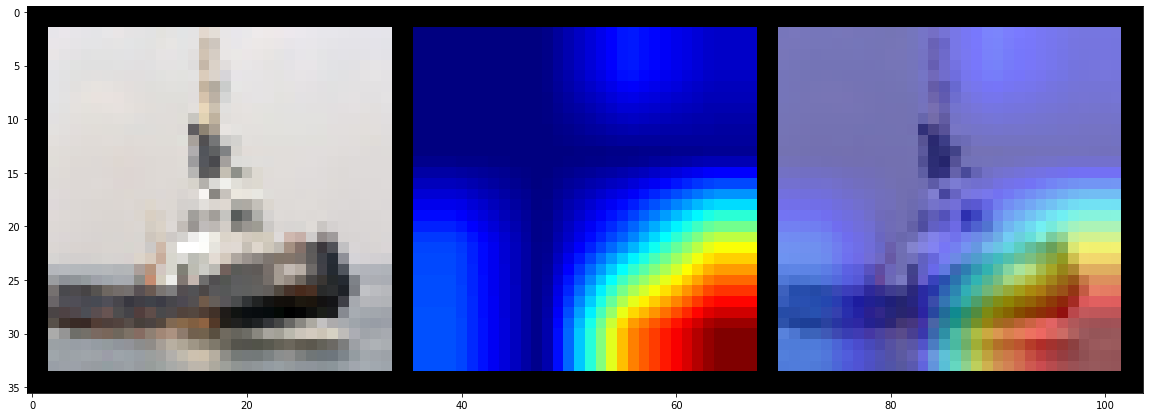

Prediction : ship, Actual : ship


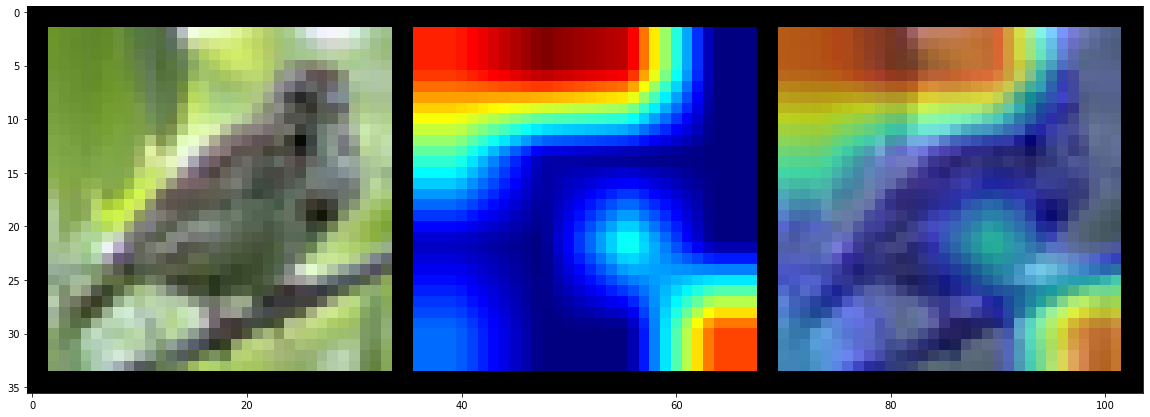

Prediction : bird, Actual : bird


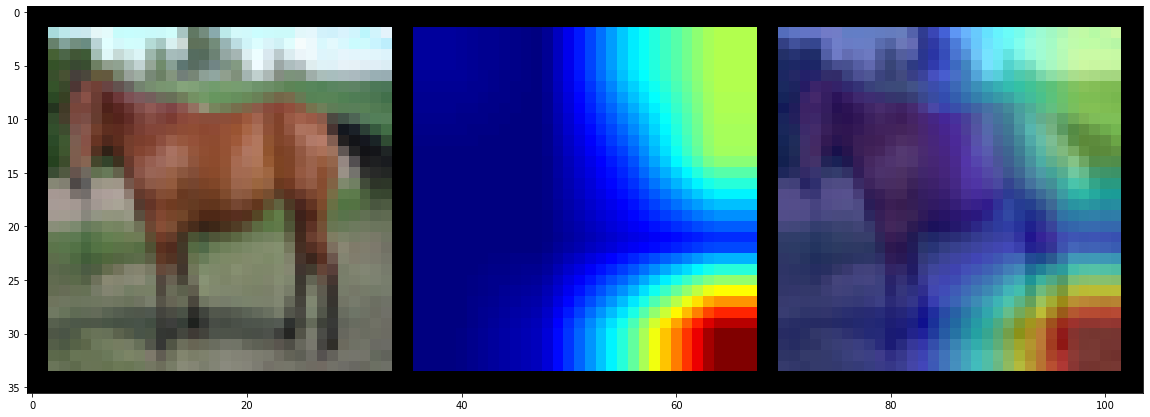

Prediction : horse, Actual : horse


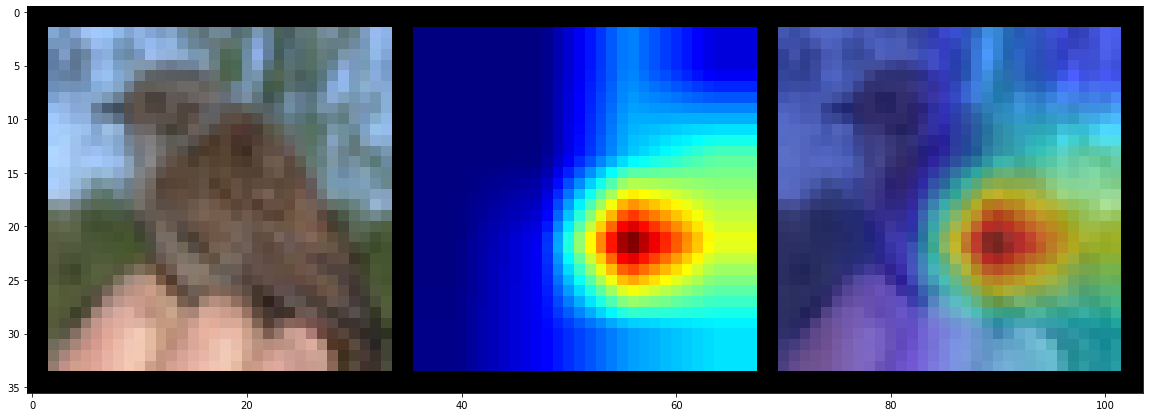

Prediction : bird, Actual : bird


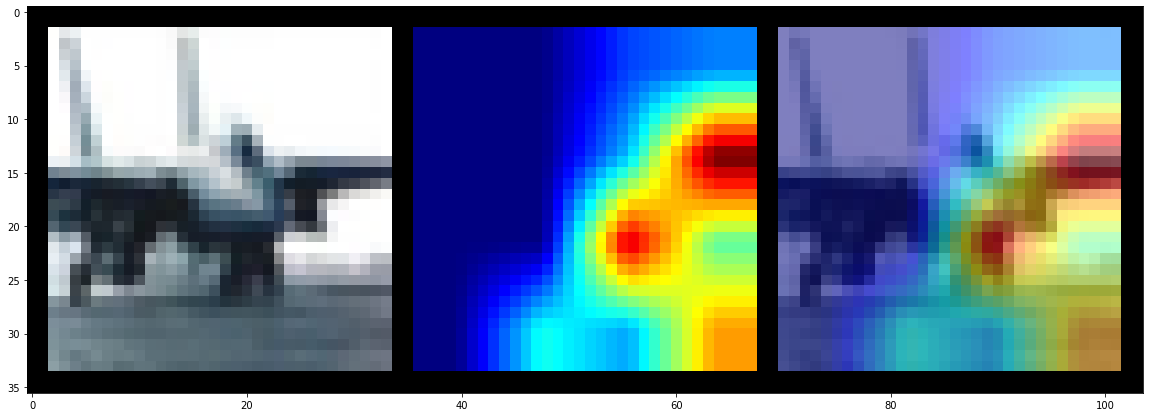

Prediction : plane, Actual : plane


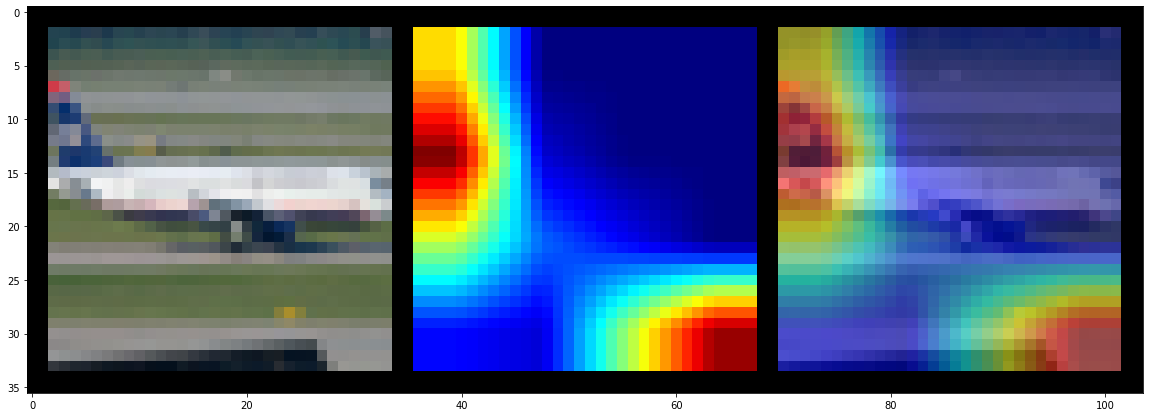

Prediction : plane, Actual : plane


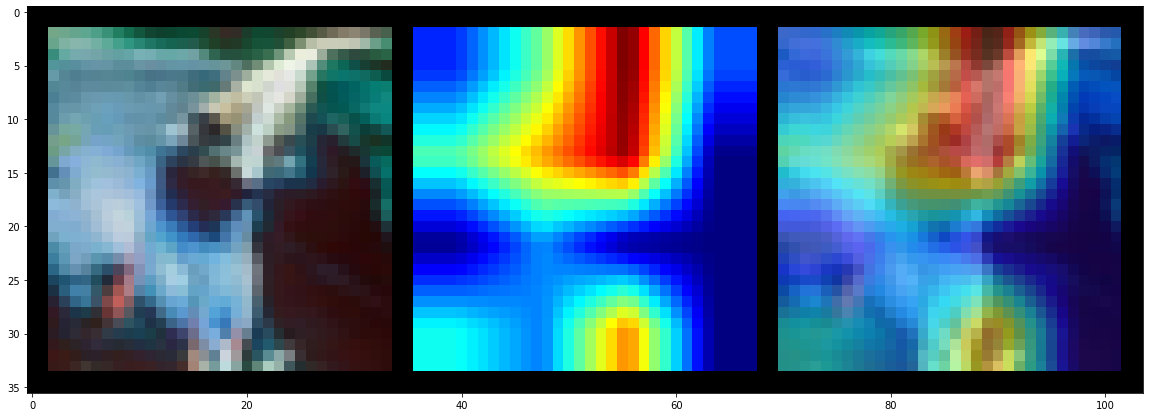

Prediction : bird, Actual : bird


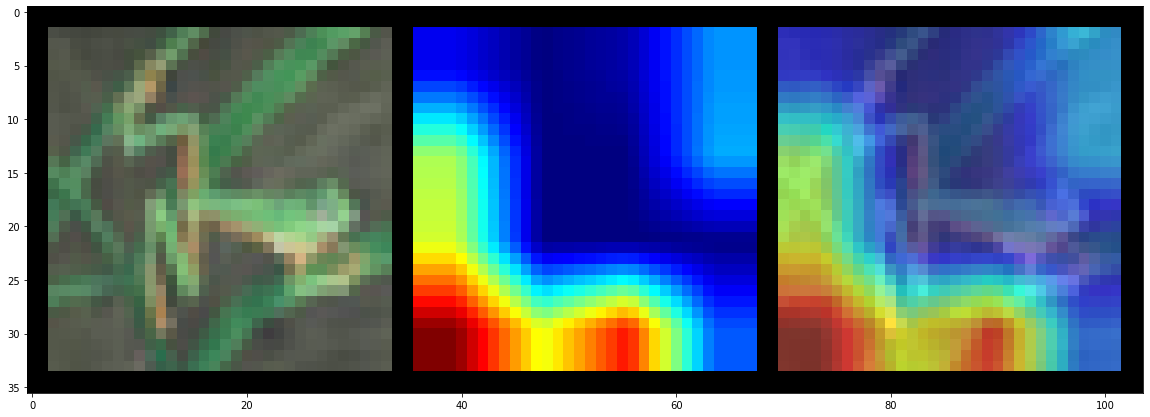

Prediction : frog, Actual : frog


In [20]:
helper.DisplayGradCamImages(model.module, 'resnet', 'layer4', testloader, classes, device, 25)

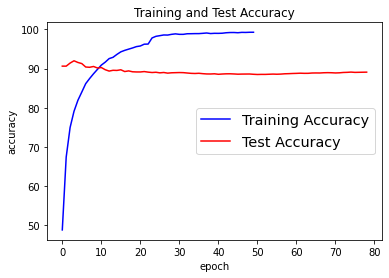

In [21]:
helper.PlotCurves([48.826,
  67.41,
  74.964,
  79.09,
  81.906,
  84.016,
  86.156,
  87.46,
  88.672,
  89.788,
  90.886,
  91.638,
  92.548,
  92.878,
  93.62,
  94.274,
  94.654,
  94.962,
  95.264,
  95.61,
  95.768,
  96.228,
  96.258,
  97.818,
  98.236,
  98.404,
  98.58,
  98.556,
  98.742,
  98.862,
  98.742,
  98.742,
  98.888,
  98.904,
  98.926,
  98.928,
  99.0,
  99.084,
  98.944,
  99.002,
  98.992,
  99.028,
  99.146,
  99.204,
  99.21,
  99.152,
  99.244,
  99.228,
  99.268,
  99.276],
  [90.625,
  90.625,
  91.40625,
  91.9921875,
  91.5625,
  91.27604166666667,
  90.40178571428571,
  90.33203125,
  90.53819444444444,
  90.15625,
  90.26988636363636,
  89.71354166666667,
  89.36298076923077,
  89.56473214285714,
  89.53125,
  89.697265625,
  89.24632352941177,
  89.40972222222223,
  89.18585526315789,
  89.140625,
  89.13690476190476,
  89.24005681818181,
  89.09646739130434,
  88.99739583333333,
  89.0625,
  88.91225961538461,
  89.00462962962963,
  88.83928571428571,
  88.92780172413794,
  88.95833333333333,
  88.98689516129032,
  88.96484375,
  88.87310606060606,
  88.78676470588235,
  88.75,
  88.80208333333333,
  88.70354729729729,
  88.63075657894737,
  88.62179487179488,
  88.671875,
  88.54801829268293,
  88.61607142857143,
  88.66279069767442,
  88.671875,
  88.62847222222223,
  88.56997282608695,
  88.59707446808511,
  88.60677083333333,
  88.61607142857143,
  88.546875,
  88.49571078431373,
  88.52163461538461,
  88.51709905660377,
  88.55613425925925,
  88.59375,
  88.56026785714286,
  88.59649122807018,
  88.671875,
  88.70497881355932,
  88.75,
  88.78073770491804,
  88.82308467741936,
  88.78968253968254,
  88.7939453125,
  88.8701923076923,
  88.88494318181819,
  88.87593283582089,
  88.9361213235294,
  88.96059782608695,
  88.93973214285714,
  88.88644366197182,
  88.92144097222223,
  89.0089897260274,
  89.04138513513513,
  89.10416666666667,
  89.03166118421052,
  89.0523538961039,
  89.07251602564102,
  89.09])